In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sounddevice as sd
import math
%matplotlib inline

In [18]:
cd = np.loadtxt('corrupted_speech.txt')
music = np.loadtxt('music.txt')
fs = 22000
#cd = cd.reshape(280223,1)
#music = music.reshape(280223,1)
N = cd.shape[0]
ml = music.shape[0]
#print(type(N))
#print(music[0:5])
#sd.play(music,fs)

In [23]:
#define parameters. filter order m, step size step_s and weight_co    
ss = 0.0006
ERLE = []
# weight_co is m*1
m=300
weight_co = np.zeros((m,1))
#print(weight_co)
# create another variables which wil be used in future
weight_track = np.zeros((m,N-m))
#build new input matrix based on m
# caculate eigenvalue and auto-corrilation matrix
x = np.zeros((m,N-m))
md = cd[m:N]
for i in range(0,(N-m)):
    temp = music[i:i+m]
    x[:,i] = temp[::-1]
R = (x@x.T)/(N-m)
value,vector = np.linalg.eig(R)
max_ev = max(value)
# step 2 training w
e_train = np.zeros(N-m)
J_train = np.zeros(N-m)
ERLE_d = np.zeros(N-m)
ERLE_e = np.zeros(N-m)
J = np.zeros(20)
lc = []
for iter in range(0,20):
    learn_curve = 0
    for i in range(0,N-m):
        y = weight_co.T@x[:,i]
    #print(y)
        e_train[i] = md[i]-y
    #print(e[i])
        error = e_train[i]
        ERLE_d[i] = md[i]**2
        ERLE_e[i] = error**2
        J_train[i] = error**2
        learn_curve = learn_curve+error**2
        a = 2*ss*e_train[i]
        weight_co[:,0] = weight_co[:,0] + a*x[:,i]
        weight_track[:,i] = weight_co[:,0]
    lc.append(sum(J_train))

<function matplotlib.pyplot.show>

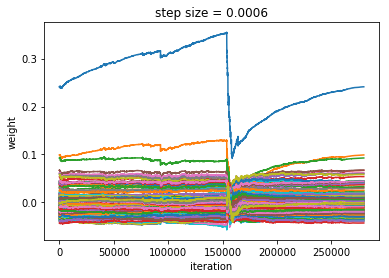

In [24]:
for l in range(0,m-1):
    plt.plot(weight_track[l,:])
plt.xlabel('iteration')
plt.ylabel('weight')
plt.title('step size = 0.0006')
plt.show

In [53]:
sd.play(e_train,fs)

In [7]:
print(lc)

[506.1104077428846, 408.70220571729669, 405.59607690140314, 404.48814509454473, 403.91811591622491, 403.56442211830216, 403.32231406532145, 403.14911433036275, 403.0223467534417, 402.92790661028522, 402.85633273814648, 402.801171505073, 402.75799277612231, 402.72372593420539, 402.69620946338478, 402.67389180200007, 402.65563606686317, 402.64059302877445, 402.62811755622653, 402.61771247494232]


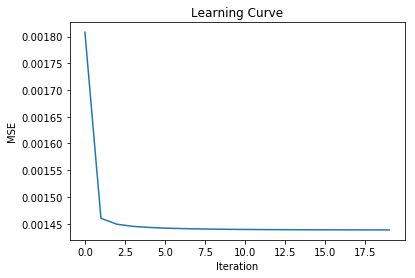

In [8]:
for i in range(0,20):
    lc[i]=lc[i]/(N-m)
lc_x_axis = np.arange(0,20,1)
plt.plot(lc_x_axis,lc)
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('MSE')

In [25]:
ERLE = 10*math.log10(sum(ERLE_d)/sum(ERLE_e))
print(ERLE)

22.071867463841386


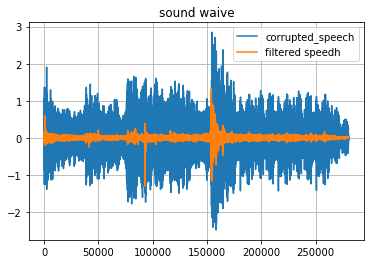

In [11]:
plt.plot(cd,label='corrupted_speech')
plt.legend(loc='upper right')
plt.plot(e_train,label='filtered speedh')
plt.legend(loc='upper right')
plt.grid()
plt.title('sound waive')
plt.show()